# Trabajo de Grupo - Neural Network  


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#load dataset.
#df = pd.read_csv('dataset.txt')
df = pd.read_csv('dataset.csv')
#df.head()

names = df.iloc[0]
print(names)
# Votar la segunda fila de nombres porque ya existe una cabecera X1, X2, ...
df = df.drop(0)

ID                             ID
X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_1
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: 0, dtype: object


In [3]:
# Mostrar los datos despues de votar los nombres.
df.set_index('ID', inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Convertir a numerico.

In [4]:
#df.describe()
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Agregando nuevas variables

In [5]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Pagando deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,...,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000,2,2,2,34,0,0,0,0,0,...,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000,2,2,1,37,0,0,0,0,0,...,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000,1,2,1,57,-1,0,-1,0,0,...,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


## Dividir entre entrenamiento(24,000), validacion(3,000), test (3,000)

In [6]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)

In [7]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape
# Reconstruir pandas dataframe solo de los datos de entrenval.
dftv = pd.concat([X_entrenval, y_entrenval], axis=1)


## Corregir por desbalancia  
Nuevos dataframes con nombres X_entren_os, y_entren_os  

In [8]:
# Corregir desbalancia.
# Crear nuevo entren dataframe
balance = y_entren.value_counts()
num_muestras = balance[0]-balance[1]
print('balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entren = pd.concat([X_entren, y_entren], axis=1)
deudores = Xy_entren[Xy_entren['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entren_os = pd.concat([Xy_entren, mas_deudores])
X_entren_os = Xy_entren_os.drop('Y', axis=1)
y_entren_os = Xy_entren_os['Y']
print('neuvo balance=\n', y_entren_os.value_counts())


balance=
 0    18688
1     5312
Name: Y, dtype: int64 
num muestras= 13376
neuvo balance=
 1    18688
0    18688
Name: Y, dtype: int64


## Explorando los Datos - con entren y val datos originales  

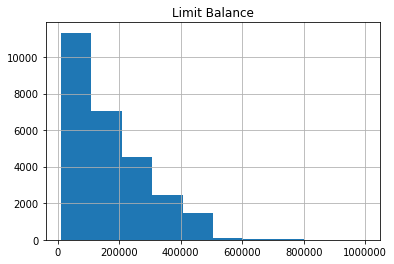

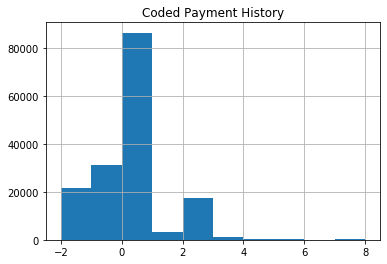

Monthly Bill Statement Amount
count    1.620000e+05
mean     4.488606e+04
std      6.667883e+04
min     -2.090510e+05
25%      2.400000e+03
50%      1.931500e+04
75%      5.715450e+04
max      1.664089e+06
dtype: float64


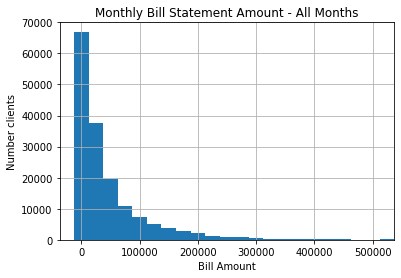

Monthly Amount of Previous Payment
count    1.620000e+05
mean     5.272188e+03
std      1.788870e+04
min      0.000000e+00
25%      3.900000e+02
50%      1.900000e+03
75%      4.524000e+03
max      1.684259e+06
dtype: float64


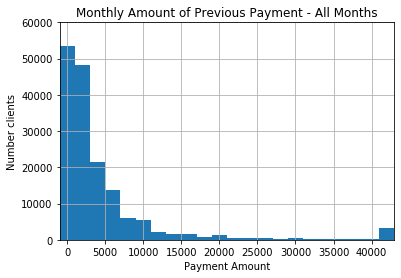

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn

dftv.X1.hist()
plt.title("Limit Balance")
plt.show()

X6_11 = dftv.X6.append([dftv.X7, dftv.X8, dftv.X9, dftv.X10, dftv.X11])
X6_11.hist()
plt.title("Coded Payment History")
plt.show()

# Histogramas de variables mensuales.
X12_17 = dftv.X12.append([dftv.X13, dftv.X14, dftv.X15, dftv.X16, dftv.X17])
print("Monthly Bill Statement Amount")
print(X12_17.describe())
plt.axis([-37500, 537500, 0, 70000])
binBoundaries = np.linspace(-37500, 537500, 24)
binBoundaries[-1] = 2000000
X12_17.hist(bins=binBoundaries)
plt.title("Monthly Bill Statement Amount - All Months")
plt.xlabel("Bill Amount")
plt.ylabel("Number clients")
plt.show()


X18_23 = dftv.X18.append([dftv.X19, dftv.X20, dftv.X21, dftv.X22, dftv.X23])
print("Monthly Amount of Previous Payment")
print(X18_23.describe())
plt.axis([-1000, 43000, 0, 60000])
binBoundaries = np.linspace(-1000, 43000, 23)
binBoundaries[-1] = 2000000
X18_23.hist(bins=binBoundaries)
plt.title("Monthly Amount of Previous Payment - All Months")
plt.xlabel("Payment Amount")
plt.ylabel("Number clients")
plt.show()

## Función para tomar sqrt de montos  
Montos de dinero tienen mucho obliquidad en sus distribuciones. Entonces, hay que corregir este para mejor oportunidad en entrenamiento.  

El dataframe X_entren_os_tr tiene los mismos datos como X_entren_os pero con montos transformados.

Tambien, el datafram X_val_tr tiene los mismos datos como X_val pero con montos transformados.  

In [10]:
# Compensar por oblicuidad de la distribucion del dinero.
# Función para aplicar a cualquier X (entran, val, test, entran_os)
cols_monto = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
def sqrt_monto(X):
    for x in cols_monto:
        #print(x)
        X.loc[X[x]>0, x] = np.sqrt(X.loc[X[x]>0, x])
        X.loc[X[x]<0, x] = -np.sqrt(np.absolute((X.loc[X[x]<0,x])))

X_entren_os_tr = X_entren_os.copy()
#print(X_entren_os_tr.describe())
sqrt_monto(X_entren_os_tr)
#print(X_entren_os_tr.describe())
X_val_tr = X_val.copy()
sqrt_monto(X_val_tr)

# Preparar X_test_tr tambien.
X_test_tr = X_test.copy()
sqrt_monto(X_test_tr)

In [11]:
# Ver los variables despues de transformacion.
# X12 ... X23 están transformados.
X_entren_os_tr.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,...,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000,37376.000000
mean,153443.255565,1.590914,1.868713,1.541658,35.547250,0.234081,0.085135,0.034889,-0.040159,-0.105843,...,0.440198,0.420730,0.388459,0.360358,0.346232,0.403888,0.538042,0.390468,0.263587,0.353283
std,126415.872321,0.491672,0.769637,0.523153,9.421454,1.267859,1.346559,1.345380,1.330665,1.293682,...,0.407991,0.397712,0.377758,0.360797,0.357242,23.002033,34.614397,23.012033,1.050322,7.313393
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.395540,-1.025100,-1.374500,-0.876743,-0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.020792,0.017688,0.015287,0.011176,0.008411,0.034115,0.030630,0.015177,0.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.371795,0.342733,0.307428,0.269792,0.234630,0.055274,0.054316,0.044384,0.039774,0.041296
75%,220000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.844893,0.810496,0.724950,0.655576,0.629932,0.261912,0.242053,0.170946,0.145902,0.185284
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,5.456200,4.558050,4.645500,4.935500,2.694100,4444.333333,5001.000000,4444.333333,129.705128,690.655172


## Función para representar pagos como variables numericos y categoricales
Es un poco problematico en que no todos los algoritmos queren los variables.  
Tampoco, aun que algunos usarán los variables categoricales, no van a querer convertido a 'dummies'.  
Entonces, pongamos en otro dataframe y dejar a los funcciones a convertir a dummies.  
Los variables X6 ... X11 están 'dropped'.  

X_entren_os_tr_pago, X_val_tr_pago, X_test_tr_pago  


Para construir los dummies podemos usar:
```
X_entren_os_tr_pago = pd.get_dummies(X_entren_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)   
X_val_tr_pago = pd.get_dummies(X_val_tr_pago, prefix = cols_pago, columns=cols_pago_cat)  
X_test_tr_pago = pd.get_dummies(X_test_tr_pago, prefix = cols_pago, columns=cols_pago_cat)  
```







In [12]:
# Construir varibles categorical y numerical por pagos.
cols_pago = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
cols_pago_cat = ['X6cat', 'X7cat', 'X8cat', 'X9cat', 'X10cat', 'X11cat']
def cat_num_pago(X):
    for x in cols_pago:
        xcat = x+'cat'
        X[xcat] = X[x]
        X.loc[X[xcat]>0, xcat] = 1
        X[xcat] = X[xcat].astype('category')
        xnum = x+'num'
        X[xnum] = X[x]
        X.loc[X[xnum]<0, xnum] = 0
        
    
X_entren_os_tr_pago = X_entren_os_tr.copy()    
cat_num_pago(X_entren_os_tr_pago)
X_entren_os_tr_pago.drop(columns=cols_pago, inplace=True)

X_val_tr_pago = X_val_tr.copy()
cat_num_pago(X_val_tr_pago)
X_val_tr_pago.drop(columns=cols_pago, inplace=True)

# Preparar X_text_tr_pago tambien.
X_test_tr_pago = X_test_tr.copy()
cat_num_pago(X_test_tr_pago)
X_test_tr_pago.drop(columns=cols_pago, inplace=True)

#X_entren_os_tr_pago = pd.get_dummies(X_entren_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
#X_entrenval_os_tr_pago = pd.get_dummies(X_entrenval_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
#X_val_tr_pago = pd.get_dummies(X_val_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
#X_test_tr_pago = pd.get_dummies(X_test_tr_pago, prefix = cols_pago, columns=cols_pago_cat)

In [13]:
X_entren_os_tr_pago.head()
#X_val_tr_pago.head()
#X_test_tr_pago.head()

,X1,X2,X3,X4,X5,X12,X13,X14,X15,X16,...,X7cat,X7num,X8cat,X8num,X9cat,X9num,X10cat,X10num,X11cat,X11num
ID,,,,,,,,,,,,,,,,,,,,,
25035,20000,1,2,1,61,38.470768,19.748418,27.928480,0.000000,19.748418,...,1,2,-1,0,-1,0,-2,0,-1,0
22521,40000,2,3,1,40,-23.043437,51.584882,62.217361,38.574603,0.000000,...,-1,0,1,2,1,2,1,2,-2,0
24034,100000,1,1,2,26,301.975165,305.586322,310.324024,301.426608,304.506158,...,0,0,0,0,0,0,0,0,0,0
4206,130000,1,2,2,25,335.501118,345.593692,324.625939,222.807091,216.360810,...,0,0,1,2,1,2,1,2,0,0
27610,200000,2,2,2,26,392.300905,0.000000,0.000000,0.000000,59.439044,...,0,0,-2,0,-2,0,-1,0,0,0


## Función de costo adaptado

> El costo adaptado es nuestra medida principal de la calidad.  
Los medidas demas son solo para comparar con otros resultados.  

Con porciento de 'default' de 22.12%, si decimos que todos va a pagar su deuda, vamos a tener un exactitud de 87.88%, pero vamos a tener un costo adaptado de 0.594 por cliente.  Este es nuestra linea base para comparar nuestros resultados.



In [14]:
# Función de costo y exatitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)


## Mostrar probabilidades - empirical (por metodo de Yeh) vs prediccion  

In [36]:
# define the function to estimate empirical probabilities.
# returns predicted probability (trimmed by n on both sides)
# and empirical probability calculated by Yeh's SMM method.
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# plot actual versus predicted probabilities sorted ascending on predicted.
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred, filename=None):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirical x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirical")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))
    if filename:
        plt.savefig(filename, dpi=1500)

# Combine the procedures
def mostrarPQ(y, y_prob, filename=None):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred, filename)



## Capacitar entren+val para usar para entren y test

In [16]:
## Hay que corregir por la desbalancia en entrenval tambien,
## para cuando estamos listo para el 'test'.
balance = y_entrenval.value_counts()
num_muestras = balance[0]-balance[1]
print('entran+val: balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entrenval = pd.concat([X_entrenval, y_entrenval], axis=1)
deudores = Xy_entrenval[Xy_entrenval['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entrenval_os = pd.concat([Xy_entrenval, mas_deudores])
X_entrenval_os = Xy_entrenval_os.drop('Y', axis=1)
y_entrenval_os = Xy_entrenval_os['Y']
print('entren+val: neuvo balance=\n', y_entrenval_os.value_counts())

# Preparar X_entrenval_os_tr tambien
# Pare cuando hacemos el test.
X_entrenval_os_tr = X_entrenval_os.copy()
sqrt_monto(X_entrenval_os_tr)

# Preparar X_entrenval_os_tr_pago tambien.
X_entrenval_os_tr_pago = X_entrenval_os_tr.copy()
cat_num_pago(X_entrenval_os_tr_pago)
X_entrenval_os_tr_pago.drop(columns=cols_pago, inplace=True)


entran+val: balance=
 0    20993
1     6007
Name: Y, dtype: int64 
num muestras= 14986
entren+val: neuvo balance=
 1    20993
0    20993
Name: Y, dtype: int64


## linea base de costo=0.5576  

# Neural Network using Keras

## Probar con datos originales. Sin 'oversampling' y sin transformar.  

### ID = 1  

In [17]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

scaler = StandardScaler()
scaler.fit(X_entren)
_X_entren = scaler.transform(X_entren)
_X_val = scaler.transform(X_val)

default = y_entren.sum()
ratio = float(default/len(y_entren))
print('Default Ratio :',ratio)



Using TensorFlow backend.


Default Ratio : 0.22133333333333333


In [18]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

n_cols = _X_entren.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
model.fit(_X_entren, y_entren, epochs=20, validation_data=(_X_val, y_val))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 24000 samples, validate on 3000 samples
Epoch 1/20
24000/24000 [==============================] - 1s 42us/step - loss: 0.4781 - acc: 0.8046 - val_loss: 0.4585 - val_acc: 0.8110
Epoch 2/20
24000/24000 [==============================] - 1s 30us/step - loss: 0.4475 - acc: 0.8166 - val_loss: 0.4492 - val_acc: 0.8140
Epoch 3/20
24000/24000 [==============================] - 1s 30us/step - loss: 0.4397 - acc: 0.8183 - val_loss: 0.4424 - val_acc: 0.8177
Epoch 4/20
24000/24000 [==============================] - 1s 30us/step - loss: 0.4346 - acc: 0.8194 - val_loss: 0.4338 - val_acc: 0.8190
Epoch 5/20
24000/24000 [==============================] - 1s 30us/step - loss: 0.4308 - acc: 0.8205 - val_loss: 0.4338 - val_acc: 0.8177
Epoch 6/20
24000/24000 [==============================] - 1s 30us/step - loss: 0.4284 - acc: 0.8210 - val_loss: 0.4275 - val_acc: 0.8180
Epoch 7/2

** Validación **
Exactitud:     0.8193333333333334
Precisión:     0.6825775656324582
Exhaustividad: 0.4115107913669065
AUC:           0.6769050703038437
Costo por cliente: 0.6306666666666667
(3000,) (3000,)


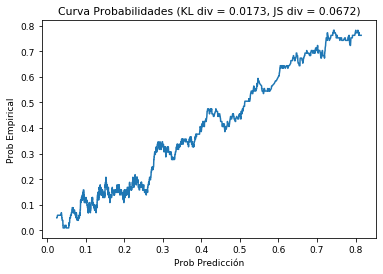

In [19]:
# Check cost measure.
# Predict makes 2-D array of (n,1), squeeze it back to vector (n,).
print('** Validación **')
y_val_prob = np.squeeze(model.predict(_X_val))
y_pred = (y_val_prob > 0.5)
_custom_cost(y_val, y_pred)

#Plot probabilities.
print(y_val.shape, y_val_prob.shape)
mostrarPQ(y_val, y_val_prob, "neuralnetid1.pdf")

# Probar con oversampling  

## Capacitar oversampling con raiz cuadrado del monto de dinero y pago categorical  

In [20]:
# Usar categorias como dummy variables.
X_entren_os_tr_pago = pd.get_dummies(X_entren_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
X_entrenval_os_tr_pago = pd.get_dummies(X_entrenval_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
X_val_tr_pago = pd.get_dummies(X_val_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
X_test_tr_pago = pd.get_dummies(X_test_tr_pago, prefix = cols_pago, columns=cols_pago_cat)

## Probar en red neuronal de 3 capa escondidas.  
### Demonstar visualización tambien.  
### Mejoramiento dramatico!!  

### ID = 16  

In [21]:
# Con oversampling, sqrt montos transformados y pagos categoricales.

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
print('num columns=', len(X_entren_os_tr_pago.columns))

scaler = StandardScaler()
scaler.fit(X_entren_os_tr_pago)
_X_entren = scaler.transform(X_entren_os_tr_pago)
_X_val = scaler.transform(X_val_tr_pago)

default = y_entren_os.sum()
ratio = float(default/len(y_entren_os))
print('Default Ratio :',ratio)

num columns= 63
Default Ratio : 0.5


In [22]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

n_cols = _X_entren.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,), name="procesar_input"))
model.add(Dense(16, activation='relu', name="transformar_2_capa"))
model.add(Dense(8, activation='relu', name="transformar_3_capa"))
model.add(Dense(1, activation='sigmoid', name="probabilidad_prediccion"))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(_X_entren, y_entren_os, epochs=20, validation_data=(_X_val, y_val))



Train on 37376 samples, validate on 3000 samples
Epoch 1/20
37376/37376 [==============================] - 1s 40us/step - loss: 0.5708 - acc: 0.7027 - val_loss: 0.5276 - val_acc: 0.7700
Epoch 2/20
37376/37376 [==============================] - 1s 31us/step - loss: 0.5488 - acc: 0.7201 - val_loss: 0.5415 - val_acc: 0.7647
Epoch 3/20
37376/37376 [==============================] - 1s 31us/step - loss: 0.5418 - acc: 0.7257 - val_loss: 0.5479 - val_acc: 0.7563
Epoch 4/20
37376/37376 [==============================] - 1s 31us/step - loss: 0.5369 - acc: 0.7273 - val_loss: 0.5381 - val_acc: 0.7390
Epoch 5/20
37376/37376 [==============================] - 1s 31us/step - loss: 0.5322 - acc: 0.7313 - val_loss: 0.5349 - val_acc: 0.7557
Epoch 6/20
37376/37376 [==============================] - 1s 31us/step - loss: 0.5268 - acc: 0.7358 - val_loss: 0.5075 - val_acc: 0.7727
Epoch 7/20
37376/37376 [==============================] - 1s 31us/step - loss: 0.5230 - acc: 0.7371 - val_loss: 0.5598 - val_acc:

In [23]:
# Miramos como fue el entrenamiento.

# Si podemos evaluar model contra otro base de datos.... como test!
#model.evaluate(test_images, test_labels)

# history is a dictionary.
history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Visualización de la curva de entrenamiento
Al ejecutar model.fit() hemos recibido como variable de retorno el historial del entrenamiento, el cual podemos usar para graficar la curva de entrenamiento con las métricas que hemos configurado.

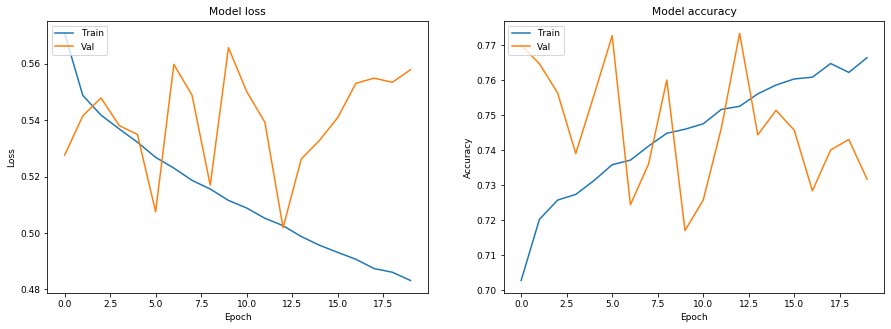

In [24]:
# Adaptado de: https://keras.io/visualization/
# Por la diferencia entre entren con oversampling y val, 
# no hay consistencia entre ellos.
plt.figure(figsize=(15,5))
plt.tight_layout()

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


### Visualización del modelo
Keras nos permite visualizar un resumen de nuestro modelo, tanto de manera gráfica como textual:

In [25]:
#from IPython.display import SVG
##from tensorflow.keras.utils import model_to_dot
#from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='neuralnetmodel3levels.pdf')

In [26]:
model.summary()
# capa de input (None, 45)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
procesar_input (Dense)       (None, 32)                2048      
_________________________________________________________________
transformar_2_capa (Dense)   (None, 16)                528       
_________________________________________________________________
transformar_3_capa (Dense)   (None, 8)                 136       
_________________________________________________________________
probabilidad_prediccion (Den (None, 1)                 9         
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


** Validación **
Exactitud:     0.7316666666666667
Precisión:     0.44639376218323584
Exhaustividad: 0.6589928057553956
AUC:           0.7062859907301924
Costo por cliente: 0.43166666666666664
(3000,) (3000,)


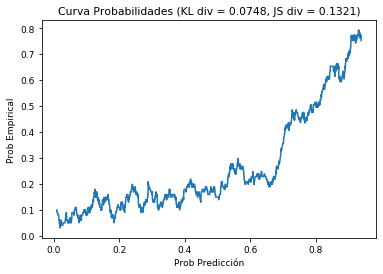

In [27]:
# Check cost measure.
# Predict makes 2-D array of (n,1), squeeze it back to vector (n,).
print('** Validación **')
y_val_prob = np.squeeze(model.predict(_X_val))
y_pred = (y_val_prob > 0.5)
_custom_cost(y_val, y_pred)

#Plot probabilities.
print(y_val.shape, y_val_prob.shape)
mostrarPQ(y_val, y_val_prob)

## Funcción para procesar experimentos de red neuronal  
### Tambien, probar función de perdida adaptada  

In [28]:
# Experimento con funccion de perdida adaptada.
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

def prep_datos_nn(X_entren, X_val, y_entren):
  scaler = StandardScaler()
  scaler.fit(X_entren)
  _X_entren = scaler.transform(X_entren)
  _X_val = scaler.transform(X_val)
  # print proporción 'default'
  default = y_entren.sum()
  ratio = float(default/len(y_entren))
  print('Default Ratio :',ratio)
  return _X_entren, _X_val

In [29]:
# Experimento con loss adaptada.
# Probar con función de perdida, copiado de Keras.
# https://github.com/keras-team/keras/blob/master/keras/losses.py
import keras.backend as K

def get_J_binary_crossentropy(coef=1.0):
    cost_coef = coef
    def J_binary_crossentropy(y_true, y_pred):
        def J1_binary_crossentropy(target, output, from_logits=False):
            if not from_logits:
                output = K.clip(output, 1e-7, 1 - 1e-7)
                output = K.log(output / (1 - output))
            return (cost_coef * target * -K.log(K.sigmoid(output)) +
                    (1 - target) * -K.log(1 - K.sigmoid(output)))
        return K.mean(J1_binary_crossentropy(y_true, y_pred), axis=-1)
    return J_binary_crossentropy


In [30]:
# Deep Learning Libraries
# Try L2 regulizer 
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2

def run_nn(_X_entren, y_entren, _X_val, y_val, num_epochs=20, coef=1.0, reg=0.0, layers=[32, 16, 8]):
  print('neural net con cost_coef=', coef, 'regularization=', reg)
  n_cols = _X_entren.shape[1]

  model = Sequential()
  n_sz = layers[0]
  print('initial layer size=', n_sz)
  model.add(Dense(n_sz, activation='relu', input_shape = (n_cols,), kernel_regularizer=l2(reg)))

  for n_sz in layers[1:]:
    print('layer size=', n_sz)
    model.add(Dense(n_sz, activation='relu', kernel_regularizer=l2(reg)))
   
  #model.add(Dense(32, activation='relu', input_shape = (n_cols,), kernel_regularizer=l2(reg)))
  #model.add(Dense(16, activation='relu', kernel_regularizer=l2(reg)))
  #model.add(Dense(8, activation='relu', kernel_regularizer=l2(reg)))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',loss=get_J_binary_crossentropy(coef), metrics=['acc'])

  model.fit(_X_entren, y_entren, epochs=num_epochs, validation_data=(_X_val, y_val))
  print('\ninput number columns=', n_cols)
  print(model.summary())
    
  y_val_prob = np.squeeze(model.predict(_X_val))
  return y_val_prob


In [31]:
# Check cost measure.

def calc_costo(y_val, y_val_prob, filename=None):
  print('** Validación **')
  y_pred = (y_val_prob > 0.5)
  _custom_cost(y_val, y_pred)

  #Plot probabilities.
  #print(y_val.shape, y_val_prob.shape)
  mostrarPQ(y_val, y_val_prob, filename)


### ID = 13  

Default Ratio : 0.5
neural net con cost_coef= 1.0 regularization= 0.0
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 2s 47us/step - loss: 0.5851 - acc: 0.6918 - val_loss: 0.5768 - val_acc: 0.7477
Epoch 2/20
37340/37340 [==============================] - 1s 32us/step - loss: 0.5570 - acc: 0.7140 - val_loss: 0.5208 - val_acc: 0.7823
Epoch 3/20
37340/37340 [==============================] - 1s 32us/step - loss: 0.5478 - acc: 0.7204 - val_loss: 0.5510 - val_acc: 0.7667
Epoch 4/20
37340/37340 [==============================] - 1s 32us/step - loss: 0.5419 - acc: 0.7244 - val_loss: 0.5201 - val_acc: 0.7743
Epoch 5/20
37340/37340 [==============================] - 1s 32us/step - loss: 0.5355 - acc: 0.7266 - val_loss: 0.5346 - val_acc: 0.7727
Epoch 6/20
37340/37340 [==============================] - 1s 32us/step - loss: 0.5307 - acc: 0.7321 - val_loss: 0.5538 - val_acc: 0.7383
Epoch 7

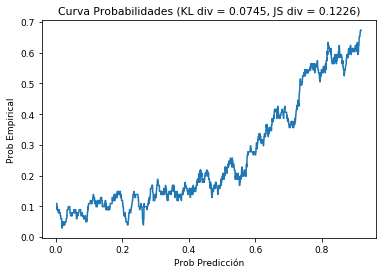

In [34]:
# Run the NN
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20)
calc_costo(y_val, y_val_prob)

### ID = 14  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 2s 57us/step - loss: 0.9044 - acc: 0.5844 - val_loss: 0.9621 - val_acc: 0.4150
Epoch 2/20
37340/37340 [==============================] - 1s 35us/step - loss: 0.8564 - acc: 0.6308 - val_loss: 0.9311 - val_acc: 0.4673
Epoch 3/20
37340/37340 [==============================] - 1s 34us/step - loss: 0.8416 - acc: 0.6453 - val_loss: 0.9300 - val_acc: 0.4883
Epoch 4/20
37340/37340 [==============================] - 1s 34us/step - loss: 0.8301 - acc: 0.6551 - val_loss: 0.9539 - val_acc: 0.4927
Epoch 5/20
37340/37340 [==============================] - 1s 34us/step - loss: 0.8220 - acc: 0.6612 - val_loss: 0.9400 - val_acc: 0.4997
Epoch 6/20
37340/37340 [==============================] - 1s 34us/step - loss: 0.8140 - acc: 0.6649 - val_loss: 0.9374 - val_acc: 0.4810
Epoch 7

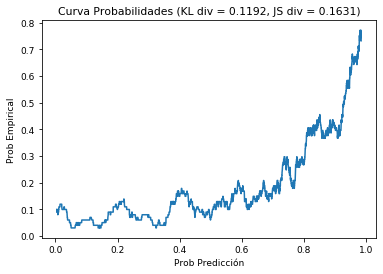

In [40]:
# Run the NN with cost coefficient = 2.5.  Should see something! 
# Aumento grande en exhaustividad, pero precisión bajó mucho.
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 15  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 4s 106us/step - loss: 1.0436 - acc: 0.5891 - val_loss: 1.0268 - val_acc: 0.4670
Epoch 2/20
37340/37340 [==============================] - 2s 47us/step - loss: 0.9196 - acc: 0.6216 - val_loss: 0.9320 - val_acc: 0.4847
Epoch 3/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.8975 - acc: 0.6265 - val_loss: 0.9068 - val_acc: 0.5357
Epoch 4/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.8889 - acc: 0.6317 - val_loss: 0.9698 - val_acc: 0.4553
Epoch 5/20
37340/37340 [==============================] - 2s 50us/step - loss: 0.8841 - acc: 0.6319 - val_loss: 0.9356 - val_acc: 0.4760
Epoch 6/20
37340/37340 [==============================] - 2s 51us/step - loss: 0.8812 - acc: 0.6343 - val_loss: 0.9516 - val_acc: 0.4677
Epoc

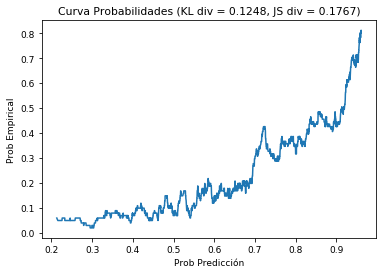

In [63]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 15A  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 64
layer size= 16
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 4s 102us/step - loss: 1.0306 - acc: 0.5948 - val_loss: 0.9923 - val_acc: 0.4587
Epoch 2/20
37340/37340 [==============================] - 2s 49us/step - loss: 0.9060 - acc: 0.6198 - val_loss: 0.9558 - val_acc: 0.4663
Epoch 3/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.8882 - acc: 0.6266 - val_loss: 0.8986 - val_acc: 0.5397
Epoch 4/20
37340/37340 [==============================] - 2s 49us/step - loss: 0.8818 - acc: 0.6329 - val_loss: 0.9906 - val_acc: 0.4517
Epoch 5/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.8776 - acc: 0.6328 - val_loss: 0.9277 - val_acc: 0.4897
Epoch 6/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.8752 - acc: 0.6356 - val_loss: 0.9495 - val_acc: 0.4580
Epoch 7/20
37340/3

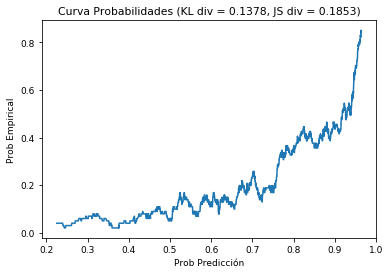

In [64]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 15B  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 4s 112us/step - loss: 1.0853 - acc: 0.5991 - val_loss: 1.0125 - val_acc: 0.4640
Epoch 2/20
37340/37340 [==============================] - 2s 52us/step - loss: 0.9174 - acc: 0.6237 - val_loss: 1.0308 - val_acc: 0.3793
Epoch 3/20
37340/37340 [==============================] - 2s 52us/step - loss: 0.9016 - acc: 0.6260 - val_loss: 0.9818 - val_acc: 0.4460
Epoch 4/20
37340/37340 [==============================] - 2s 52us/step - loss: 0.8934 - acc: 0.6314 - val_loss: 0.9923 - val_acc: 0.4340
Epoch 5/20
37340/37340 [==============================] - 2s 52us/step - loss: 0.8906 - acc: 0.6325 - val_loss: 1.0276 - val_acc: 0.4043
Epoch 6/20
37340/37340 [==============================] - 2s 52us/step - loss: 0.8863 - acc: 0.6343 - val_loss: 0.9949 - val_a

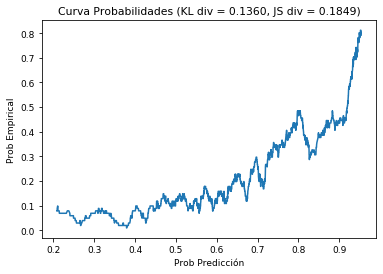

In [65]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 18  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 2s 58us/step - loss: 1.0601 - acc: 0.6105 - val_loss: 0.9848 - val_acc: 0.5180
Epoch 2/20
37340/37340 [==============================] - 1s 37us/step - loss: 0.9112 - acc: 0.6413 - val_loss: 0.9191 - val_acc: 0.5487
Epoch 3/20
37340/37340 [==============================] - 1s 36us/step - loss: 0.8838 - acc: 0.6420 - val_loss: 0.9484 - val_acc: 0.5097
Epoch 4/20
37340/37340 [==============================] - 1s 36us/step - loss: 0.8740 - acc: 0.6460 - val_loss: 0.9796 - val_acc: 0.4483
Epoch 5/20
37340/37340 [==============================] - 1s 36us/step - loss: 0.8705 - acc: 0.6445 - val_loss: 0.9723 - val_acc: 0.4703
Epoch 6/20
37340/37340 [==============================] - 1s 36us/step - loss: 0.8675 - acc: 0.6450 - val_loss: 0.9190 - val_acc: 0.5357
Epoch

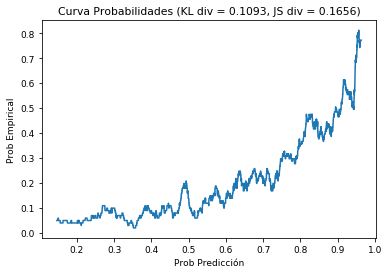

In [39]:
# Run the NN - with dummy variables y cost_coef = 2.5, reg = 0.005.
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005)
calc_costo(y_val, y_val_prob)

### ID = 10  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 2s 67us/step - loss: 1.1051 - acc: 0.5798 - val_loss: 1.0467 - val_acc: 0.3870
Epoch 2/20
37340/37340 [==============================] - 2s 42us/step - loss: 0.9263 - acc: 0.6068 - val_loss: 0.9349 - val_acc: 0.5273
Epoch 3/20
37340/37340 [==============================] - 2s 41us/step - loss: 0.9059 - acc: 0.6182 - val_loss: 0.9640 - val_acc: 0.4653
Epoch 4/20
37340/37340 [==============================] - 1s 39us/step - loss: 0.8983 - acc: 0.6200 - val_loss: 0.9353 - val_acc: 0.5007
Epoch 5/20
37340/37340 [==============================] - 1s 39us/step - loss: 0.8938 - acc: 0.6243 - val_loss: 0.9706 - val_acc: 0.4580
Epoch 6/20
37340/37340 [==============================] - 1s 39us/step - loss: 0.8925 - acc: 0.6262 - val_loss: 0.8994 - val_ac

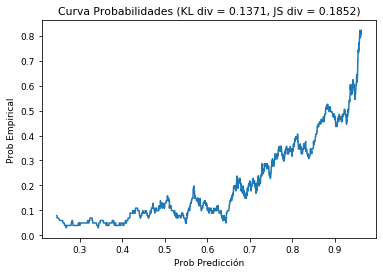

In [41]:
# Run the NN - without sqrt transform - 4 capas internales.
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 24  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 70us/step - loss: 1.1038 - acc: 0.6254 - val_loss: 0.9651 - val_acc: 0.5820
Epoch 2/20
37340/37340 [==============================] - 2s 40us/step - loss: 0.9081 - acc: 0.6386 - val_loss: 0.9771 - val_acc: 0.4580
Epoch 3/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.8887 - acc: 0.6396 - val_loss: 0.9348 - val_acc: 0.5110
Epoch 4/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.8812 - acc: 0.6438 - val_loss: 1.0159 - val_acc: 0.4337
Epoch 5/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.8775 - acc: 0.6422 - val_loss: 0.9678 - val_acc: 0.4427
Epoch 6/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.8733 - acc: 0.6446 - val_loss: 0.9461 - val_ac

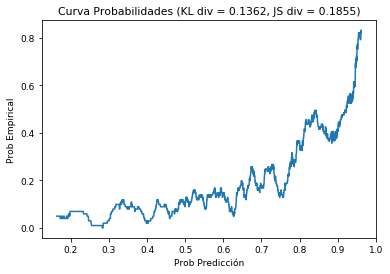

In [42]:
# NN - raiz cuadrado y categorical y 4 capas internales.
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 2  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 32
layer size= 16
layer size= 8
Train on 24000 samples, validate on 3000 samples
Epoch 1/20
24000/24000 [==============================] - 2s 91us/step - loss: 0.7976 - acc: 0.7788 - val_loss: 0.7750 - val_acc: 0.8063
Epoch 2/20
24000/24000 [==============================] - 1s 47us/step - loss: 0.7573 - acc: 0.8013 - val_loss: 0.7600 - val_acc: 0.8043
Epoch 3/20
24000/24000 [==============================] - 1s 47us/step - loss: 0.7448 - acc: 0.7994 - val_loss: 0.7554 - val_acc: 0.7867
Epoch 4/20
24000/24000 [==============================] - 1s 46us/step - loss: 0.7364 - acc: 0.7984 - val_loss: 0.7471 - val_acc: 0.7803
Epoch 5/20
24000/24000 [==============================] - 1s 45us/step - loss: 0.7302 - acc: 0.7990 - val_loss: 0.7441 - val_acc: 0.7893
Epoch 6/20
24000/24000 [==============================] - 1s 44us/step - loss: 0.7247 - acc: 0.7978 - val_loss: 0.7565 - val_acc: 0.8047
Epoch 7

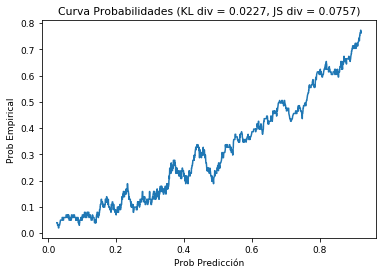

In [43]:
# NN - raiz cuadrado y categorical y 4 capas internales.
_X_entren, _X_val = prep_datos_nn(X_entren, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 3  

Default Ratio : 0.22208333333333333
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 32
layer size= 16
layer size= 8
Train on 24000 samples, validate on 3000 samples
Epoch 1/20
24000/24000 [==============================] - 2s 89us/step - loss: 0.9743 - acc: 0.7902 - val_loss: 0.8682 - val_acc: 0.7897
Epoch 2/20
24000/24000 [==============================] - 1s 41us/step - loss: 0.8297 - acc: 0.8020 - val_loss: 0.8089 - val_acc: 0.7967
Epoch 3/20
24000/24000 [==============================] - 1s 41us/step - loss: 0.7910 - acc: 0.7994 - val_loss: 0.7903 - val_acc: 0.7953
Epoch 4/20
24000/24000 [==============================] - 1s 39us/step - loss: 0.7769 - acc: 0.7998 - val_loss: 0.7740 - val_acc: 0.7840
Epoch 5/20
24000/24000 [==============================] - 1s 39us/step - loss: 0.7698 - acc: 0.7971 - val_loss: 0.7685 - val_acc: 0.7987
Epoch 6/20
24000/24000 [==============================] - 1s 39us/step - loss: 0.7653 - acc: 0.7995 - val_loss: 0.7643 - val_a

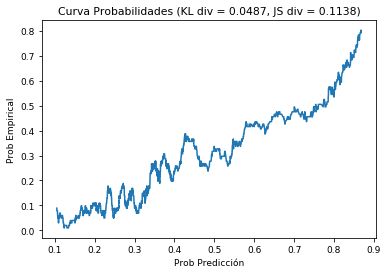

In [45]:
# NN - raiz cuadrado y categorical y 4 capas internales.
_X_entren, _X_val = prep_datos_nn(X_entren, X_val, y_entren)
y_val_prob = run_nn(_X_entren, y_entren, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 4  

Default Ratio : 0.5
neural net con cost_coef= 1.0 regularization= 0.0
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 74us/step - loss: 0.5994 - acc: 0.6770 - val_loss: 0.5714 - val_acc: 0.7567
Epoch 2/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.5640 - acc: 0.7080 - val_loss: 0.5545 - val_acc: 0.7653
Epoch 3/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.5544 - acc: 0.7150 - val_loss: 0.5771 - val_acc: 0.7363
Epoch 4/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.5486 - acc: 0.7187 - val_loss: 0.5610 - val_acc: 0.7507
Epoch 5/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.5440 - acc: 0.7209 - val_loss: 0.5517 - val_acc: 0.7570
Epoch 6/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.5410 - acc: 0.7239 - val_loss: 0.5612 - val_acc: 0.7530
Epoch 7

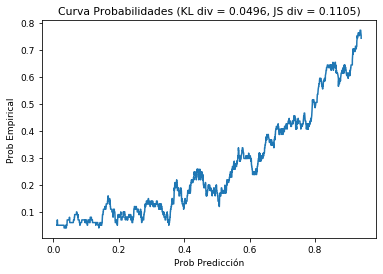

In [47]:
# NN - raiz cuadrado y categorical y 4 capas internales.
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=1.0, reg=0.0, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 5  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 73us/step - loss: 0.9018 - acc: 0.5690 - val_loss: 0.9500 - val_acc: 0.4533
Epoch 2/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.8651 - acc: 0.6231 - val_loss: 0.8957 - val_acc: 0.5047
Epoch 3/20
37340/37340 [==============================] - 2s 40us/step - loss: 0.8534 - acc: 0.6377 - val_loss: 0.9242 - val_acc: 0.4863
Epoch 4/20
37340/37340 [==============================] - 2s 41us/step - loss: 0.8434 - acc: 0.6456 - val_loss: 0.9304 - val_acc: 0.5203
Epoch 5/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8352 - acc: 0.6503 - val_loss: 0.9588 - val_acc: 0.4613
Epoch 6/20
37340/37340 [==============================] - 1s 39us/step - loss: 0.8284 - acc: 0.6558 - val_loss: 0.9254 - val_acc: 0.4883
Epoch 7

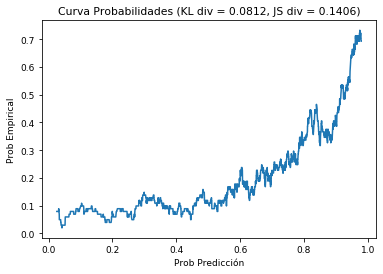

In [48]:
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 6  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 75us/step - loss: 1.0907 - acc: 0.5657 - val_loss: 1.0486 - val_acc: 0.4020
Epoch 2/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.9387 - acc: 0.6056 - val_loss: 1.0250 - val_acc: 0.3997
Epoch 3/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.9061 - acc: 0.6146 - val_loss: 0.9945 - val_acc: 0.4400
Epoch 4/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.8951 - acc: 0.6202 - val_loss: 0.9714 - val_acc: 0.4497
Epoch 5/20
37340/37340 [==============================] - 2s 40us/step - loss: 0.8893 - acc: 0.6262 - val_loss: 0.9730 - val_acc: 0.4423
Epoch 6/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.8853 - acc: 0.6262 - val_loss: 0.9846 - val_acc: 0.4443
Epoch

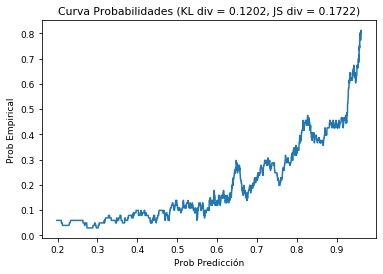

In [49]:
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 7  

Default Ratio : 0.5
neural net con cost_coef= 1.0 regularization= 0.0
initial layer size= 64
layer size= 16
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 73us/step - loss: 0.5888 - acc: 0.6926 - val_loss: 0.5681 - val_acc: 0.7760
Epoch 2/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.5624 - acc: 0.7106 - val_loss: 0.5568 - val_acc: 0.7613
Epoch 3/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.5517 - acc: 0.7170 - val_loss: 0.6022 - val_acc: 0.7137
Epoch 4/20
37340/37340 [==============================] - 2s 40us/step - loss: 0.5452 - acc: 0.7224 - val_loss: 0.5422 - val_acc: 0.7517
Epoch 5/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.5401 - acc: 0.7239 - val_loss: 0.5389 - val_acc: 0.7637
Epoch 6/20
37340/37340 [==============================] - 1s 37us/step - loss: 0.5351 - acc: 0.7291 - val_loss: 0.5316 - val_acc: 0.7760
Epoch 7/20
37340/3734

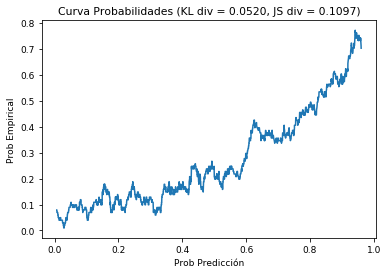

In [50]:
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=1.0, reg=0.0, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 8  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 64
layer size= 16
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 75us/step - loss: 0.8953 - acc: 0.5814 - val_loss: 0.9709 - val_acc: 0.4267
Epoch 2/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.8591 - acc: 0.6245 - val_loss: 0.9533 - val_acc: 0.4597
Epoch 3/20
37340/37340 [==============================] - 1s 38us/step - loss: 0.8432 - acc: 0.6387 - val_loss: 0.9200 - val_acc: 0.5000
Epoch 4/20
37340/37340 [==============================] - 2s 41us/step - loss: 0.8321 - acc: 0.6515 - val_loss: 0.9172 - val_acc: 0.5197
Epoch 5/20
37340/37340 [==============================] - 2s 41us/step - loss: 0.8223 - acc: 0.6594 - val_loss: 0.9279 - val_acc: 0.5260
Epoch 6/20
37340/37340 [==============================] - 1s 39us/step - loss: 0.8155 - acc: 0.6681 - val_loss: 0.9757 - val_acc: 0.4727
Epoch 7/20
37340/3734

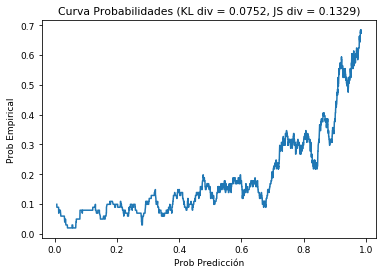

In [51]:
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 9  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 64
layer size= 16
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 81us/step - loss: 1.0857 - acc: 0.5770 - val_loss: 1.1127 - val_acc: 0.3623
Epoch 2/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.9280 - acc: 0.6049 - val_loss: 0.9864 - val_acc: 0.4303
Epoch 3/20
37340/37340 [==============================] - 1s 40us/step - loss: 0.8984 - acc: 0.6179 - val_loss: 1.0352 - val_acc: 0.3860
Epoch 4/20
37340/37340 [==============================] - 2s 42us/step - loss: 0.8871 - acc: 0.6201 - val_loss: 0.9434 - val_acc: 0.4757
Epoch 5/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8828 - acc: 0.6241 - val_loss: 0.9293 - val_acc: 0.5007
Epoch 6/20
37340/37340 [==============================] - 2s 46us/step - loss: 0.8792 - acc: 0.6281 - val_loss: 0.9984 - val_acc: 0.4190
Epoch 7/20
37340/37

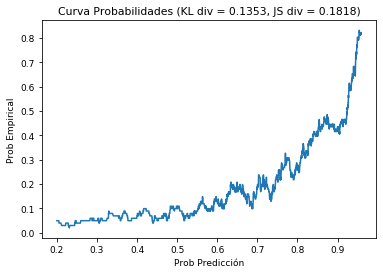

In [52]:
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 11  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 86us/step - loss: 0.8975 - acc: 0.5857 - val_loss: 0.8974 - val_acc: 0.4840
Epoch 2/20
37340/37340 [==============================] - 2s 44us/step - loss: 0.8491 - acc: 0.6297 - val_loss: 0.9628 - val_acc: 0.4423
Epoch 3/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8292 - acc: 0.6503 - val_loss: 0.9445 - val_acc: 0.5020
Epoch 4/20
37340/37340 [==============================] - 2s 44us/step - loss: 0.8157 - acc: 0.6635 - val_loss: 0.8800 - val_acc: 0.5477
Epoch 5/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8024 - acc: 0.6715 - val_loss: 0.8912 - val_acc: 0.5533
Epoch 6/20
37340/37340 [==============================] - 2s 44us/step - loss: 0.7910 - acc: 0.6776 - val_loss: 0.9550 - val_acc:

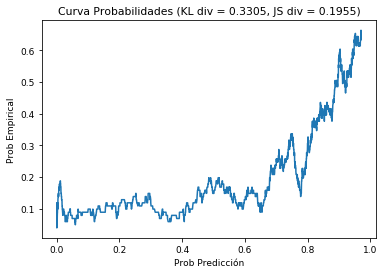

In [53]:
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 12  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 93us/step - loss: 1.0819 - acc: 0.5765 - val_loss: 1.0108 - val_acc: 0.4370
Epoch 2/20
37340/37340 [==============================] - 2s 47us/step - loss: 0.9230 - acc: 0.6078 - val_loss: 0.9302 - val_acc: 0.4907
Epoch 3/20
37340/37340 [==============================] - 2s 47us/step - loss: 0.9069 - acc: 0.6158 - val_loss: 0.9194 - val_acc: 0.4870
Epoch 4/20
37340/37340 [==============================] - 2s 47us/step - loss: 0.9007 - acc: 0.6194 - val_loss: 0.9784 - val_acc: 0.4450
Epoch 5/20
37340/37340 [==============================] - 2s 46us/step - loss: 0.8978 - acc: 0.6234 - val_loss: 0.9785 - val_acc: 0.4450
Epoch 6/20
37340/37340 [==============================] - 2s 46us/step - loss: 0.8943 - acc: 0.6250 - val_loss: 0.9239 - val_ac

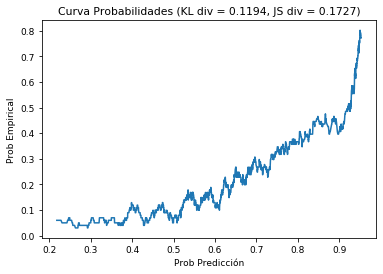

In [54]:
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 17  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 93us/step - loss: 0.8804 - acc: 0.6129 - val_loss: 0.9235 - val_acc: 0.5153
Epoch 2/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8406 - acc: 0.6484 - val_loss: 0.9463 - val_acc: 0.5090
Epoch 3/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8270 - acc: 0.6575 - val_loss: 0.9783 - val_acc: 0.4573
Epoch 4/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8173 - acc: 0.6649 - val_loss: 0.9002 - val_acc: 0.5597
Epoch 5/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8097 - acc: 0.6709 - val_loss: 0.9020 - val_acc: 0.5527
Epoch 6/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8005 - acc: 0.6780 - val_loss: 0.9114 - val_acc: 0.5577
Epoch 7

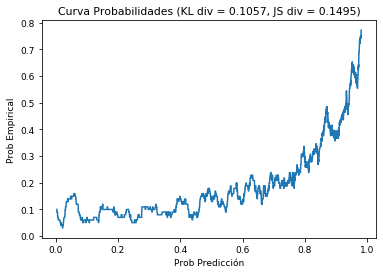

In [55]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 18  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 91us/step - loss: 1.0520 - acc: 0.6155 - val_loss: 1.0069 - val_acc: 0.4937
Epoch 2/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.9089 - acc: 0.6409 - val_loss: 0.9430 - val_acc: 0.5440
Epoch 3/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8844 - acc: 0.6409 - val_loss: 0.9621 - val_acc: 0.4853
Epoch 4/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8760 - acc: 0.6416 - val_loss: 0.9462 - val_acc: 0.4967
Epoch 5/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8711 - acc: 0.6446 - val_loss: 0.9571 - val_acc: 0.4913
Epoch 6/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8684 - acc: 0.6441 - val_loss: 0.9366 - val_acc: 0.5187
Epoch

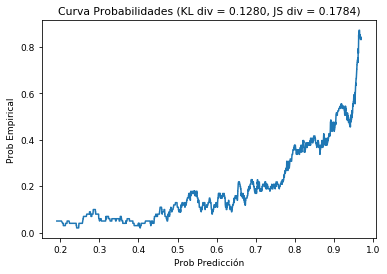

In [56]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 19  

Default Ratio : 0.5
neural net con cost_coef= 1.0 regularization= 0.0
initial layer size= 64
layer size= 16
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 88us/step - loss: 0.5680 - acc: 0.7067 - val_loss: 0.5710 - val_acc: 0.7297
Epoch 2/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.5480 - acc: 0.7198 - val_loss: 0.5273 - val_acc: 0.7667
Epoch 3/20
37340/37340 [==============================] - 2s 44us/step - loss: 0.5387 - acc: 0.7275 - val_loss: 0.5734 - val_acc: 0.7263
Epoch 4/20
37340/37340 [==============================] - 2s 42us/step - loss: 0.5305 - acc: 0.7327 - val_loss: 0.5546 - val_acc: 0.7437
Epoch 5/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.5230 - acc: 0.7370 - val_loss: 0.5983 - val_acc: 0.7033
Epoch 6/20
37340/37340 [==============================] - 2s 42us/step - loss: 0.5165 - acc: 0.7430 - val_loss: 0.5303 - val_acc: 0.7597
Epoch 7/20
37340/3734

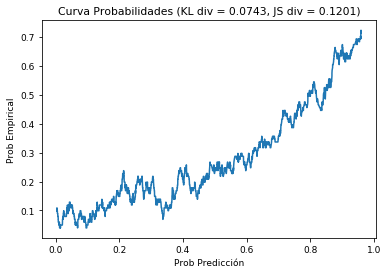

In [57]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=1.0, reg=0.0, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 20  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 64
layer size= 16
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 90us/step - loss: 0.8683 - acc: 0.6343 - val_loss: 0.9119 - val_acc: 0.5027
Epoch 2/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8377 - acc: 0.6532 - val_loss: 0.9383 - val_acc: 0.4907
Epoch 3/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8239 - acc: 0.6609 - val_loss: 0.9100 - val_acc: 0.5300
Epoch 4/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.8112 - acc: 0.6694 - val_loss: 0.8890 - val_acc: 0.5680
Epoch 5/20
37340/37340 [==============================] - 2s 42us/step - loss: 0.7991 - acc: 0.6792 - val_loss: 0.9658 - val_acc: 0.5100
Epoch 6/20
37340/37340 [==============================] - 2s 43us/step - loss: 0.7873 - acc: 0.6866 - val_loss: 0.9543 - val_acc: 0.5273
Epoch 7/20
37340/3734

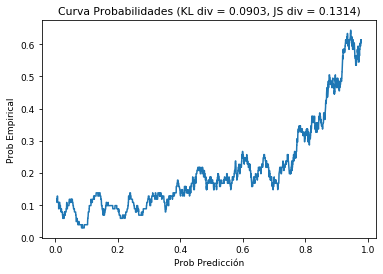

In [58]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 21  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 64
layer size= 16
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 3s 93us/step - loss: 1.0508 - acc: 0.6256 - val_loss: 0.9771 - val_acc: 0.4973
Epoch 2/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8980 - acc: 0.6382 - val_loss: 0.9834 - val_acc: 0.4553
Epoch 3/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8776 - acc: 0.6355 - val_loss: 0.9356 - val_acc: 0.4923
Epoch 4/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8693 - acc: 0.6378 - val_loss: 0.9475 - val_acc: 0.4703
Epoch 5/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8673 - acc: 0.6399 - val_loss: 0.9493 - val_acc: 0.4887
Epoch 6/20
37340/37340 [==============================] - 2s 45us/step - loss: 0.8631 - acc: 0.6422 - val_loss: 0.9175 - val_acc: 0.5070
Epoch 7/20
37340/37

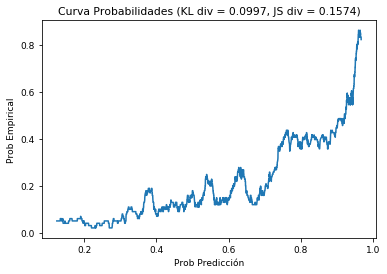

In [59]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.005, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 22  

Default Ratio : 0.5
neural net con cost_coef= 1.0 regularization= 0.0
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 4s 103us/step - loss: 0.5661 - acc: 0.7074 - val_loss: 0.5736 - val_acc: 0.7460
Epoch 2/20
37340/37340 [==============================] - 2s 49us/step - loss: 0.5470 - acc: 0.7225 - val_loss: 0.5593 - val_acc: 0.7403
Epoch 3/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.5361 - acc: 0.7300 - val_loss: 0.5710 - val_acc: 0.7370
Epoch 4/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.5275 - acc: 0.7342 - val_loss: 0.5684 - val_acc: 0.7307
Epoch 5/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.5173 - acc: 0.7432 - val_loss: 0.5290 - val_acc: 0.7563
Epoch 6/20
37340/37340 [==============================] - 2s 48us/step - loss: 0.5075 - acc: 0.7488 - val_loss: 0.5597 - val_acc

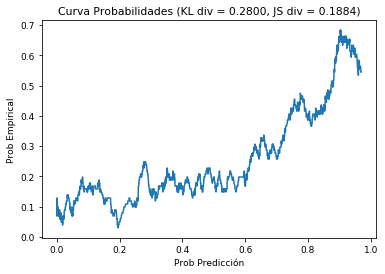

In [61]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=1.0, reg=0.0, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 23  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37340 samples, validate on 3000 samples
Epoch 1/20
37340/37340 [==============================] - 4s 103us/step - loss: 0.8700 - acc: 0.6264 - val_loss: 0.9482 - val_acc: 0.4833
Epoch 2/20
37340/37340 [==============================] - 2s 49us/step - loss: 0.8397 - acc: 0.6514 - val_loss: 0.9836 - val_acc: 0.4833
Epoch 3/20
37340/37340 [==============================] - 2s 49us/step - loss: 0.8235 - acc: 0.6601 - val_loss: 0.8999 - val_acc: 0.5603
Epoch 4/20
37340/37340 [==============================] - 2s 56us/step - loss: 0.8079 - acc: 0.6737 - val_loss: 0.9185 - val_acc: 0.5523
Epoch 5/20
37340/37340 [==============================] - 2s 57us/step - loss: 0.7915 - acc: 0.6830 - val_loss: 0.9283 - val_acc: 0.5323
Epoch 6/20
37340/37340 [==============================] - 2s 57us/step - loss: 0.7725 - acc: 0.6959 - val_loss: 0.9924 - val_acc

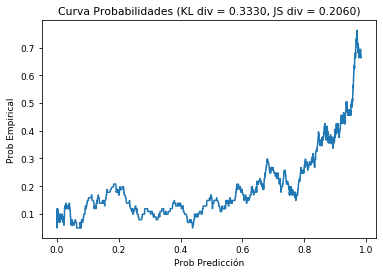

In [62]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 13A  

Default Ratio : 0.5
neural net con cost_coef= 1.0 regularization= 0.0
initial layer size= 64
Instructions for updating:
Colocations handled automatically by placer.
layer size= 16
Instructions for updating:
Use tf.cast instead.
Train on 37292 samples, validate on 3000 samples
Epoch 1/20
37292/37292 [==============================] - 1s 38us/step - loss: 0.5802 - acc: 0.6983 - val_loss: 0.5870 - val_acc: 0.7420
Epoch 2/20
37292/37292 [==============================] - 1s 28us/step - loss: 0.5566 - acc: 0.7157 - val_loss: 0.5604 - val_acc: 0.7403
Epoch 3/20
37292/37292 [==============================] - 1s 29us/step - loss: 0.5482 - acc: 0.7204 - val_loss: 0.5629 - val_acc: 0.7430
Epoch 4/20
37292/37292 [==============================] - 1s 30us/step - loss: 0.5412 - acc: 0.7263 - val_loss: 0.5701 - val_acc: 0.7213
Epoch 5/20
37292/37292 [==============================] - 1s 29us/step - loss: 0.5347 - acc: 0.7295 - val_loss: 0.5544 - val_acc: 0.7407
Epoch 6/20
37292/37292 [==============

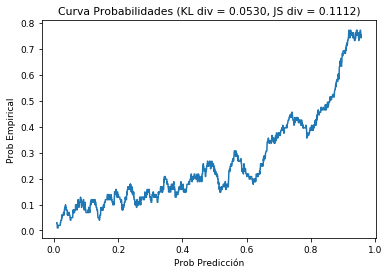

In [21]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=1.0, reg=0.0, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### ID = 13B  

Default Ratio : 0.5
neural net con cost_coef= 1.0 regularization= 0.0
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37292 samples, validate on 3000 samples
Epoch 1/20
37292/37292 [==============================] - 2s 43us/step - loss: 0.5787 - acc: 0.6952 - val_loss: 0.5556 - val_acc: 0.7450
Epoch 2/20
37292/37292 [==============================] - 1s 35us/step - loss: 0.5517 - acc: 0.7166 - val_loss: 0.6282 - val_acc: 0.6720
Epoch 3/20
37292/37292 [==============================] - 1s 35us/step - loss: 0.5415 - acc: 0.7255 - val_loss: 0.6247 - val_acc: 0.6600
Epoch 4/20
37292/37292 [==============================] - 1s 34us/step - loss: 0.5329 - acc: 0.7288 - val_loss: 0.5786 - val_acc: 0.7330
Epoch 5/20
37292/37292 [==============================] - 1s 33us/step - loss: 0.5236 - acc: 0.7353 - val_loss: 0.5965 - val_acc: 0.7000
Epoch 6/20
37292/37292 [==============================] - 1s 33us/step - loss: 0.5172 - acc: 0.7392 - val_loss: 0.5481 - val_acc:

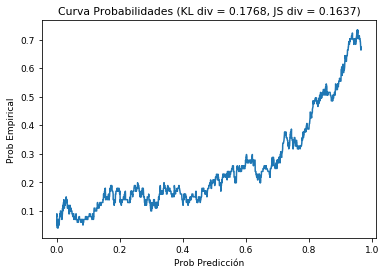

In [22]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=1.0, reg=0.0, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

### ID = 15C  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 64
layer size= 16
Train on 37292 samples, validate on 3000 samples
Epoch 1/20
37292/37292 [==============================] - 2s 41us/step - loss: 0.8891 - acc: 0.6109 - val_loss: 0.9603 - val_acc: 0.4207
Epoch 2/20
37292/37292 [==============================] - 1s 30us/step - loss: 0.8544 - acc: 0.6402 - val_loss: 0.9354 - val_acc: 0.4940
Epoch 3/20
37292/37292 [==============================] - 1s 29us/step - loss: 0.8404 - acc: 0.6532 - val_loss: 0.9208 - val_acc: 0.4907
Epoch 4/20
37292/37292 [==============================] - 1s 29us/step - loss: 0.8293 - acc: 0.6610 - val_loss: 0.9504 - val_acc: 0.5137
Epoch 5/20
37292/37292 [==============================] - 1s 29us/step - loss: 0.8179 - acc: 0.6693 - val_loss: 0.9265 - val_acc: 0.4853
Epoch 6/20
37292/37292 [==============================] - 1s 29us/step - loss: 0.8102 - acc: 0.6737 - val_loss: 0.9556 - val_acc: 0.5043
Epoch 7/20
37292/3729

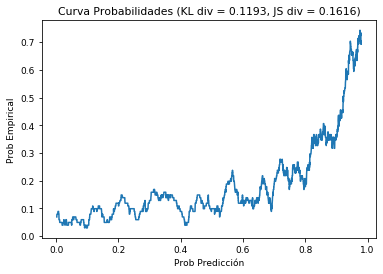

In [25]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[64, 16])
calc_costo(y_val, y_val_prob)

### 15D  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.0
initial layer size= 64
layer size= 32
layer size= 16
layer size= 8
Train on 37292 samples, validate on 3000 samples
Epoch 1/20
37292/37292 [==============================] - 2s 49us/step - loss: 0.8902 - acc: 0.5915 - val_loss: 0.9998 - val_acc: 0.3867
Epoch 2/20
37292/37292 [==============================] - 1s 34us/step - loss: 0.8488 - acc: 0.6414 - val_loss: 0.9090 - val_acc: 0.5180
Epoch 3/20
37292/37292 [==============================] - 1s 34us/step - loss: 0.8298 - acc: 0.6623 - val_loss: 0.9421 - val_acc: 0.4890
Epoch 4/20
37292/37292 [==============================] - 1s 34us/step - loss: 0.8123 - acc: 0.6746 - val_loss: 0.9253 - val_acc: 0.5210
Epoch 5/20
37292/37292 [==============================] - 1s 34us/step - loss: 0.7987 - acc: 0.6849 - val_loss: 0.8839 - val_acc: 0.5780
Epoch 6/20
37292/37292 [==============================] - 1s 34us/step - loss: 0.7839 - acc: 0.6934 - val_loss: 0.9758 - val_acc:

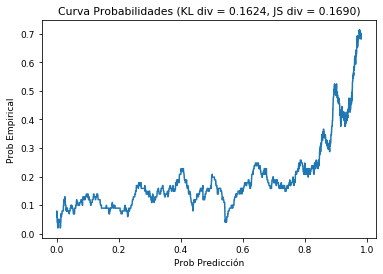

In [26]:
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5, reg=0.0, layers=[64, 32, 16, 8])
calc_costo(y_val, y_val_prob)

## Mejor Experimento - Usar para test  

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 32
layer size= 16
layer size= 8
Train on 41986 samples, validate on 3000 samples
Epoch 1/20
41986/41986 [==============================] - 2s 43us/step - loss: 1.0285 - acc: 0.6018 - val_loss: 1.0166 - val_acc: 0.4967
Epoch 2/20
41986/41986 [==============================] - 1s 32us/step - loss: 0.9091 - acc: 0.6284 - val_loss: 0.9620 - val_acc: 0.4653
Epoch 3/20
41986/41986 [==============================] - 1s 32us/step - loss: 0.8907 - acc: 0.6321 - val_loss: 0.9593 - val_acc: 0.4640
Epoch 4/20
41986/41986 [==============================] - 1s 32us/step - loss: 0.8834 - acc: 0.6356 - val_loss: 0.8924 - val_acc: 0.5450
Epoch 5/20
41986/41986 [==============================] - 1s 32us/step - loss: 0.8790 - acc: 0.6405 - val_loss: 1.0390 - val_acc: 0.4183
Epoch 6/20
41986/41986 [==============================] - 1s 32us/step - loss: 0.8766 - acc: 0.6397 - val_loss: 0.9565 - val_acc: 0.4830
Epoch

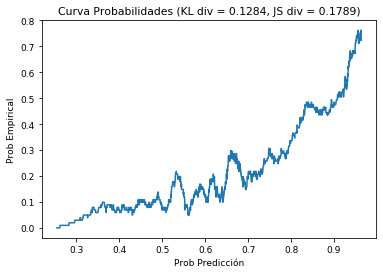

In [33]:
_X_entrenval, _X_test = prep_datos_nn(X_entrenval_os_tr, X_test_tr, y_entrenval_os)
y_test_prob = run_nn(_X_entrenval, y_entrenval_os, _X_test, y_test, num_epochs=20, coef=2.5, reg=0.005, layers=[32, 16, 8])
calc_costo(y_test, y_test_prob)

Default Ratio : 0.5
neural net con cost_coef= 2.5 regularization= 0.005
initial layer size= 32
layer size= 16
layer size= 8
Train on 41986 samples, validate on 3000 samples
Epoch 1/20
41986/41986 [==============================] - 2s 43us/step - loss: 1.0524 - acc: 0.5982 - val_loss: 1.0133 - val_acc: 0.4417
Epoch 2/20
41986/41986 [==============================] - 1s 33us/step - loss: 0.9147 - acc: 0.6313 - val_loss: 0.9960 - val_acc: 0.4517
Epoch 3/20
41986/41986 [==============================] - 1s 35us/step - loss: 0.8905 - acc: 0.6329 - val_loss: 0.9642 - val_acc: 0.4550
Epoch 4/20
41986/41986 [==============================] - 1s 33us/step - loss: 0.8819 - acc: 0.6371 - val_loss: 0.9606 - val_acc: 0.4553
Epoch 5/20
41986/41986 [==============================] - 1s 32us/step - loss: 0.8785 - acc: 0.6371 - val_loss: 0.9568 - val_acc: 0.4533
Epoch 6/20
41986/41986 [==============================] - 1s 32us/step - loss: 0.8756 - acc: 0.6403 - val_loss: 0.9468 - val_acc: 0.4823
Epoch

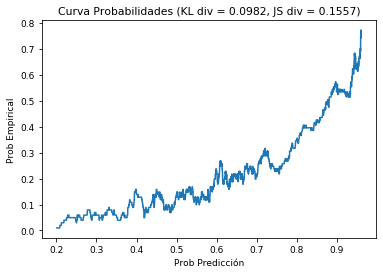

In [34]:
_X_entrenval, _X_test = prep_datos_nn(X_entrenval_os_tr, X_test_tr, y_entrenval_os)
y_test_prob = run_nn(_X_entrenval, y_entrenval_os, _X_test, y_test, num_epochs=20, coef=2.5, reg=0.005, layers=[32, 16, 8])
calc_costo(y_test, y_test_prob, "neuralnettest.pdf")

** Validación **
Exactitud:     0.5586666666666666
Precisión:     0.3022196926579397
Exhaustividad: 0.8441971383147854
AUC:           0.6635578690308638
Costo por cliente: 0.395
** Validación **
Exactitud:     0.5586666666666666
Precisión:     0.3022196926579397
Exhaustividad: 0.8441971383147854
AUC:           0.6635578690308638
Costo por cliente: 0.395


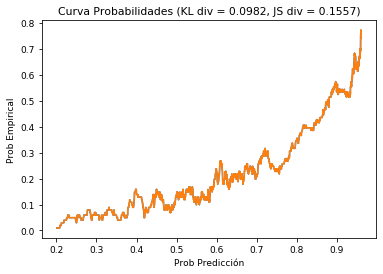

In [37]:
calc_costo(y_test, y_test_prob, "neuralnettest1.pdf")
calc_costo(y_test, y_test_prob, "neuralnettest1.png")